In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.utils import class_weight
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import plot_confusion_matrix,classification_report,confusion_matrix,f1_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
customers = pd.read_csv('/content/drive/MyDrive/DM/Classification/normalized_data_classification_training_tot.csv', sep=',', index_col=0) 
customers_test = pd.read_csv('/content/drive/MyDrive/DM/Classification/normalized_data_classification_test_tot.csv', sep=',', index_col=0) 

In [21]:
x_training = customers[["NumBaskets_mean", "DistinticProducts_mean", "Qta_mean", "Qta_entropy", "Sale_mean", "Sale_entropy"]].to_numpy()
print(len(customers[customers['label'] == 0]))
print(len(customers[customers['label'] == 1]))
print(len(customers[customers['label'] == 2]))
y_training = customers["label"].to_numpy()

843
1567
901


In [6]:
x_test = customers_test[["NumBaskets_mean", "DistinticProducts_mean", "Qta_mean", "Qta_entropy", "Sale_mean", "Sale_entropy"]].to_numpy()
y_test = customers_test["label"].to_numpy()

In [7]:
cv = StratifiedKFold(n_splits = 5, random_state = 1234, shuffle=True)

In [8]:
ros = RandomOverSampler(random_state=1234)
x_training_ro, y_training_ro = ros.fit_resample(x_training, y_training)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#**Model**

In [9]:
gnb = GaussianNB()

In [10]:
grid_search = GridSearchCV(
    gnb,
    {},
    verbose = 1,
    cv = cv,
    scoring='f1_weighted'
)

In [11]:
grid_search.fit(x_training_ro, y_training_ro)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1234, shuffle=True),
             error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=1)

In [12]:
print('Best setting parameters ', grid_search.score)
print('Mean and std of this setting ', grid_search.best_score_)

Best setting parameters  <bound method BaseSearchCV.score of GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1234, shuffle=True),
             error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=1)>
Mean and std of this setting  0.7648003209312622


In [23]:
def plot_confusion_matrix(y_true,y_pred,filename):
  matrix = confusion_matrix(y_true,y_pred)
  names = ['Low Spend','Medium Spend', 'High Spend']
  row,column = matrix.shape
  values = []
  for i in range(row):
    single_row_values = []
    for j in range(column):
      single_row_values.append(matrix[i,j]/len(y_true))
    values.append(single_row_values)
  df_cm = pd.DataFrame(matrix, index = names, columns = names)
  plt.figure(figsize = (10,7))
  ax = sn.heatmap(df_cm, annot=values,fmt='.4f',cmap='viridis',cbar = False,square = True, cbar_kws={"orientation": "horizontal"})
  ax.set_xlabel('Predicted')
  ax.set_ylabel('True')
  ax.xaxis.set_label_position('top') 
  plt.tight_layout()
  plt.savefig(filename + '.png')

              precision    recall  f1-score   support

           0       0.74      0.81      0.78       843
           1       0.74      0.74      0.74      1567
           2       0.79      0.72      0.75       901

    accuracy                           0.75      3311
   macro avg       0.76      0.76      0.76      3311
weighted avg       0.76      0.75      0.75      3311

training: 0.7541678268701646


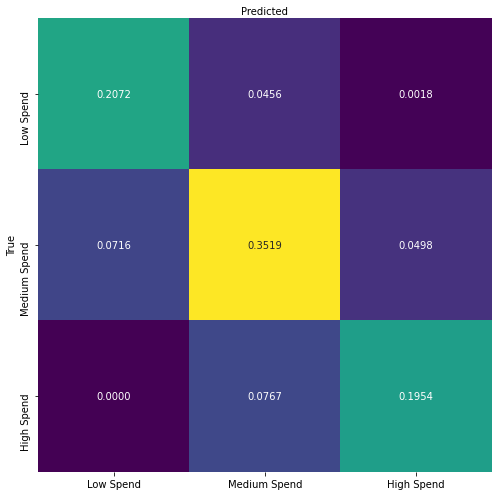

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       211
           1       0.73      0.69      0.71       392
           2       0.76      0.71      0.73       232

    accuracy                           0.73       835
   macro avg       0.74      0.75      0.74       835
weighted avg       0.74      0.73      0.73       835

test: 0.732801491051109


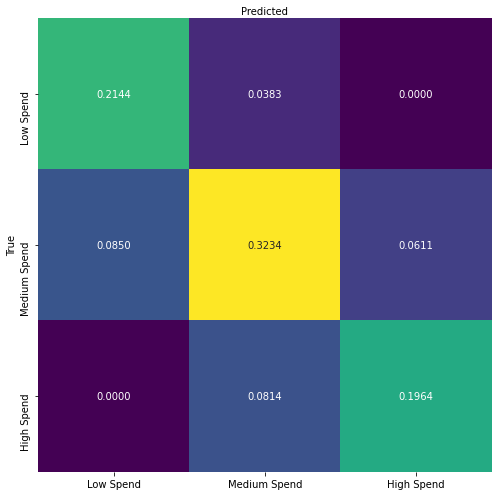

In [24]:
gnb.fit(x_training,y_training)

training_labels = gnb.predict(x_training)
print(classification_report(y_training, training_labels))
plot_confusion_matrix(y_training,training_labels,'/content/drive/MyDrive/DM/Classification/Naive_Bayes/confusion_matrix_train') #'/content/drive/MyDrive/DM/Naive_Bayes/confusion_matrix_train')
print('training: ' + str(f1_score(y_training,training_labels,average='weighted')))

plt.show() 

test_labels = gnb.predict(x_test)
print(classification_report(y_test, test_labels))
plot_confusion_matrix(y_test,test_labels,'/content/drive/MyDrive/DM/Classification/Naive_Bayes/confusion_matrix_test')#'/content/drive/MyDrive/DM/Naive_Bayes/confusion_matrix_test'
print('test: ' + str(f1_score(y_test,test_labels,average='weighted')))
plt.show() 